In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


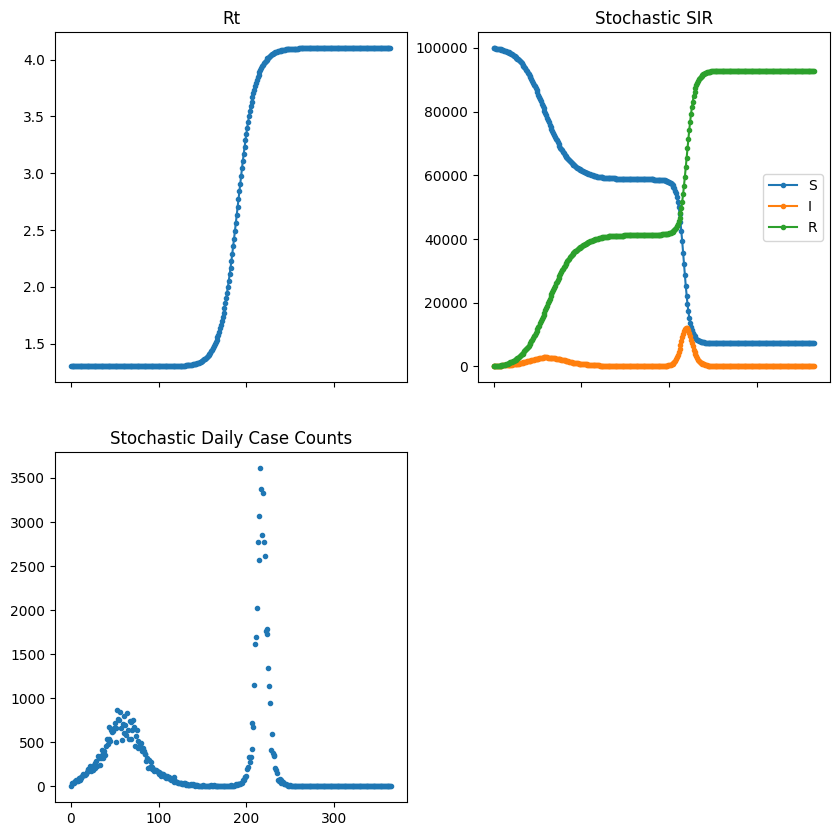

In [4]:
from epyfilter.simulate import simulate_data


true_params = {
    'rt_0': 1.3,
    'rt_1': 4.1,
    'midpoint': 190.,
    'k': 0.1,
    'n_t': 365,
    't_I': 4.,
    'N': 100_000.,
    'S0': 99_900.,
    'I0': 100.,
}

np.random.seed(1994)

data = simulate_data.simulate_data(**true_params, add_noise=True, noise_param=1/50)

data.plot_all()
data.compute_data_distribution()

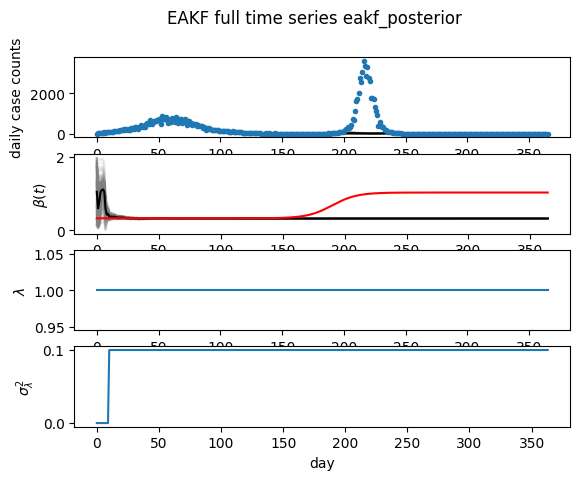

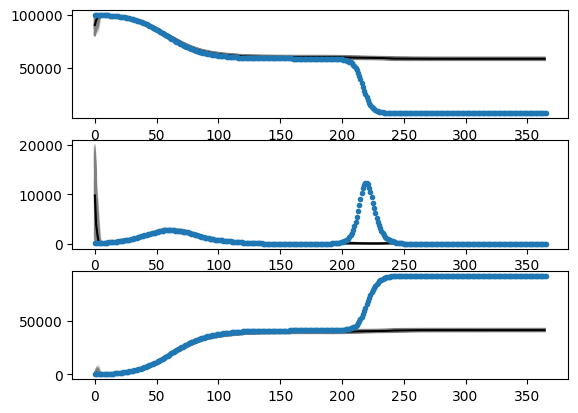

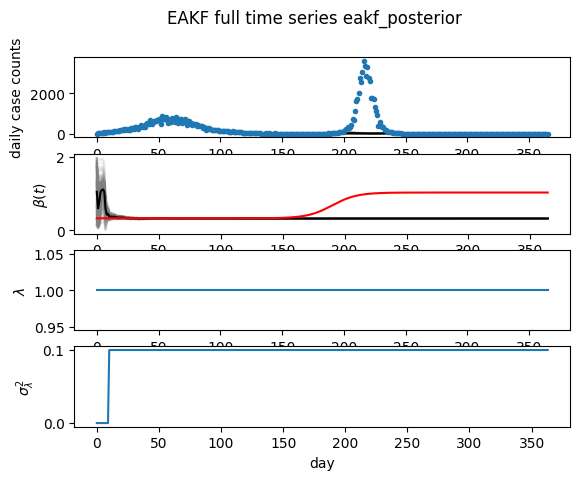

In [5]:
from epyfilter.eakf import model_da, eakf
from numpy.random import uniform

model = model_da.SIR_model(data)

kf = eakf.EnsembleAdjustmentKalmanFilter(model, m=300)


prior = {
    'beta':{
        'dist': uniform,
        'args':{
            'low': 0.1,
            'high': 2.,
        }
    },
    't_I':{
        'dist': "constant",
    },
}

kf.filter(prior, "none")

kf.plot_posterior()

# Plot regresssion for latent state and param variables

/tmp/11723644.1.himem_1d.q/ipykernel_65085/256166862.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


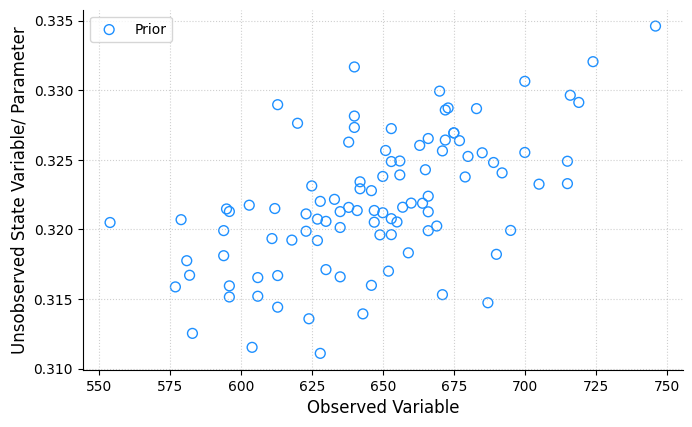

In [8]:
prior = kf.xhat_list[50].i[:100]
post = kf.x_list[50].i[:100]

prior_beta = kf.θ_list[49].beta[:100]
post_beta = kf.θ_list[50].beta[:100]

fig = plt.figure(figsize=(10, 6))  # Adjust figure size for subplots

# Main scatter plot
ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # Adjust position and size

ax_main.scatter(prior, prior_beta, marker='o', facecolors='none', edgecolors='dodgerblue', label='Prior', s=50)
# ax_main.scatter(post[:3], post_beta[:3], marker='^', color='seagreen', alpha=0.7, label='Posterior', s=50)

# OLS line
m, b = np.polyfit(prior, prior_beta, 1)
# ax_main.plot(prior, m*prior + b, '-', color='gray', linestyle='--', linewidth=1, label='OLS estimator')

# Connecting lines
# for i in range(3):
#     ax_main.scatter(prior[i], prior_beta[i], marker='o', color='dodgerblue', s=50)

ax_main.set_xlabel(r'Observed Variable', fontsize=12)
ax_main.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)
ax_main.legend(fontsize=10)
ax_main.grid(True, linestyle=':', alpha=0.6)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# # Subplot for x-axis distribution
# ax_x = fig.add_axes([0.2, 0.1, 0.6, 0.1])  # Adjust position and size
# ax_x.set_xlim(ax_main.get_xlim())
# ax_x.set_ylim([0, 1])  # Set y-axis limits for visual clarity
# # for i in range(3):
# #     ax_x.plot([prior[i], prior[i]], [0.5, 0.5], '-', alpha=0.5, linewidth=0.8,
# #              marker='o', color='dodgerblue', markersize=6)  # Prior marker
#     # ax_x.plot(post[i], 0.5, marker='^', color='seagreen', alpha=0.7, markersize=6)  # Posterior marker
# ax_x.set_yticks([])  # Hide y-axis ticks

# # Subplot for y-axis distribution
# ax_y = fig.add_axes([0.1, 0.2, 0.1, 0.6])  # Adjust position and size
# ax_y.set_ylim(ax_main.get_ylim())
# ax_y.set_xlim([0, 1])  # Set x-axis limits for visual clarity
# # for i in range(3):
# #     ax_y.plot([0.5, 0.5], [prior_beta[i], prior_beta[i]], '-', alpha=0.5, linewidth=0.8,
# #              marker='o', color='dodgerblue', markersize=6)  # Prior marker
#     # ax_y.plot(0.5, post_beta[i], marker='^', color='seagreen', alpha=0.7, markersize=6)  # Posterior marker
# ax_y.set_xticks([])  # Hide x-axis ticks

# ax_x.set_xlabel('Observed State Variable (i)', fontsize=12)
# ax_y.set_ylabel(r'Unobserved Parameter ($\beta(t)$)', fontsize=12)

plt.tight_layout()

plt.savefig(f"unobserved_reg0.pdf", format='pdf', bbox_inches='tight')

/tmp/11723644.1.himem_1d.q/ipykernel_65085/3835458175.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_main.plot(prior, m*prior + b, '-', color='red', linestyle='--', linewidth=1, label='OLS estimator')
/tmp/11723644.1.himem_1d.q/ipykernel_65085/3835458175.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


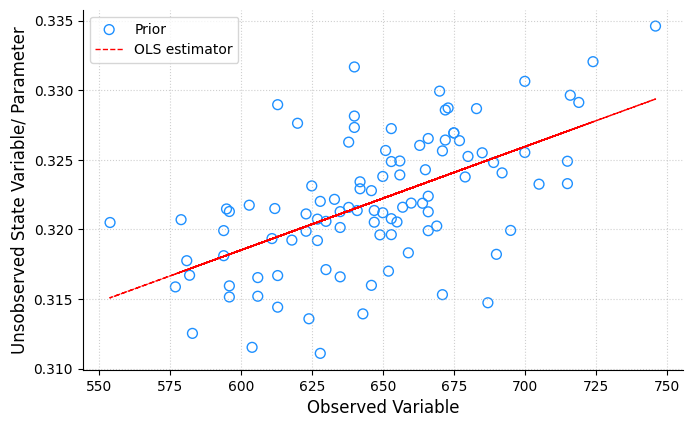

In [9]:
fig = plt.figure(figsize=(10, 6))  # Adjust figure size for subplots

# Main scatter plot
ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # Adjust position and size

ax_main.scatter(prior, prior_beta, marker='o', facecolors='none', edgecolors='dodgerblue', label='Prior', s=50)
# ax_main.scatter(post[:3], post_beta[:3], marker='^', color='seagreen', alpha=0.7, label='Posterior', s=50)

# OLS line
m, b = np.polyfit(prior, prior_beta, 1)
ax_main.plot(prior, m*prior + b, '-', color='red', linestyle='--', linewidth=1, label='OLS estimator')

# Connecting lines
# for i in range(3):
#     ax_main.scatter(prior[i], prior_beta[i], marker='o', color='dodgerblue', s=50)

ax_main.set_xlabel(r'Observed Variable', fontsize=12)
ax_main.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)
ax_main.legend(fontsize=10)
ax_main.grid(True, linestyle=':', alpha=0.6)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# # Subplot for x-axis distribution
# ax_x = fig.add_axes([0.2, 0.1, 0.6, 0.1])  # Adjust position and size
# ax_x.set_xlim(ax_main.get_xlim())
# ax_x.set_ylim([0, 1])  # Set y-axis limits for visual clarity
# # for i in range(3):
# #     ax_x.plot([prior[i], prior[i]], [0.5, 0.5], '-', alpha=0.5, linewidth=0.8,
# #              marker='o', color='dodgerblue', markersize=6)  # Prior marker
#     # ax_x.plot(post[i], 0.5, marker='^', color='seagreen', alpha=0.7, markersize=6)  # Posterior marker
# ax_x.set_yticks([])  # Hide y-axis ticks
# ax_x.set_xlabel('Increments', fontsize=10)  # Label for x-axis subplot

# # Subplot for y-axis distribution
# ax_y = fig.add_axes([0.1, 0.2, 0.1, 0.6])  # Adjust position and size
# ax_y.set_ylim(ax_main.get_ylim())
# ax_y.set_xlim([0, 1])  # Set x-axis limits for visual clarity
# # for i in range(3):
# #     ax_y.plot([0.5, 0.5], [prior_beta[i], prior_beta[i]], '-', alpha=0.5, linewidth=0.8,
# #              marker='o', color='dodgerblue', markersize=6)  # Prior marker
#     # ax_y.plot(0.5, post_beta[i], marker='^', color='seagreen', alpha=0.7, markersize=6)  # Posterior marker
# ax_y.set_xticks([])  # Hide x-axis ticks

# ax_x.set_xlabel('Observed State Variable (i)', fontsize=12)
# ax_y.set_ylabel(r'Unobserved Parameter ($\beta(t)$)', fontsize=12)

plt.tight_layout()
plt.savefig(f"unobserved_reg1.pdf", format='pdf', bbox_inches='tight')

/tmp/11723644.1.himem_1d.q/ipykernel_65085/917527440.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


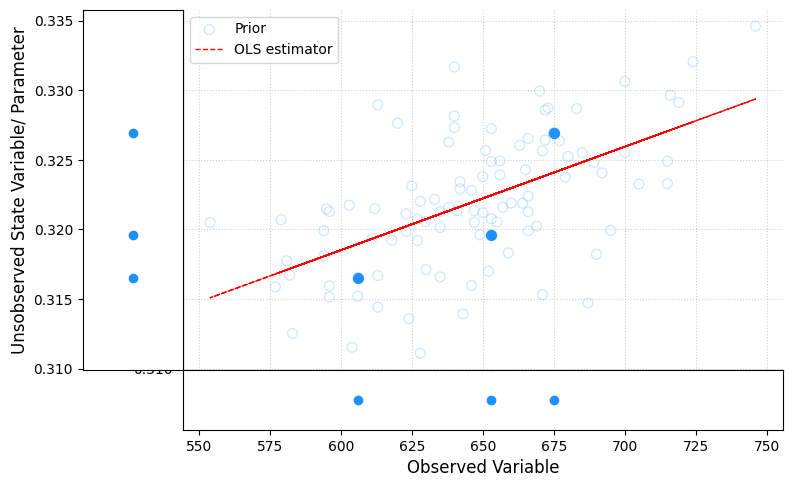

In [10]:
fig = plt.figure(figsize=(10, 6))  # Adjust figure size for subplots

# Main scatter plot
ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # Adjust position and size

ax_main.scatter(prior, prior_beta, marker='o', facecolors='none', alpha=0.2, edgecolors='dodgerblue', label='Prior', s=50)
# ax_main.scatter(post[:3], post_beta[:3], marker='^', color='seagreen', alpha=0.7, label='Posterior', s=50)

# OLS line
m, b = np.polyfit(prior, prior_beta, 1)
ax_main.plot(prior, m*prior + b, color='red', linestyle='--', linewidth=1, label='OLS estimator')

# Connecting lines
examples = [0,2,50]
for i in examples:
    ax_main.scatter(prior[i], prior_beta[i], marker='o', color='dodgerblue', s=50)
    # ax_main.plot([prior[i], post[i]], [prior_beta[i], post_beta[i]], color='red', linestyle='-', linewidth=1)

ax_main.set_xlabel(r'Observed Variable', fontsize=12)
ax_main.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)
ax_main.legend(fontsize=10)
ax_main.grid(True, linestyle=':', alpha=0.6)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# # Subplot for x-axis distribution
ax_x = fig.add_axes([0.2, 0.1, 0.6, 0.1])  # Adjust position and size
ax_x.set_xlim(ax_main.get_xlim())
ax_x.set_ylim([0, 1])  # Set y-axis limits for visual clarity
for i in examples:
    # ax_x.plot([prior[i], post[i]], [0.5, 0.5], '--', alpha=0.5, linewidth=1, color='red')
    ax_x.plot(prior[i], 0.5, '-', marker='o', color='dodgerblue', markersize=6)  # Prior marker
    # ax_x.plot(post[i], 0.5, marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_x.set_yticks([])  # Hide y-axis ticks

# # Subplot for y-axis distribution
ax_y = fig.add_axes([0.1, 0.2, 0.1, 0.6])  # Adjust position and size
ax_y.set_ylim(ax_main.get_ylim())
ax_y.set_xlim([0, 1])  # Set x-axis limits for visual clarity
for i in examples:
    # ax_y.plot([0.5, 0.5], [prior_beta[i], post_beta[i]], '-', color='red', alpha=0., linewidth=0.8,
             # marker='o', markerfacecolor='none', markeredgecolor='dodgerblue', markersize=6)  # Prior marker
    ax_y.plot(0.5, prior_beta[i], marker='o', color='dodgerblue', markersize=6)  # Posterior marker
    # ax_y.plot(0.5, post_beta[i], marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_y.set_xticks([])  # Hide x-axis ticks

ax_x.set_xlabel('Observed Variable', fontsize=12)
ax_y.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)

plt.tight_layout()

plt.savefig(f"unobserved_reg2.pdf", format='pdf', bbox_inches='tight')

/tmp/11723644.1.himem_1d.q/ipykernel_65085/2258288769.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


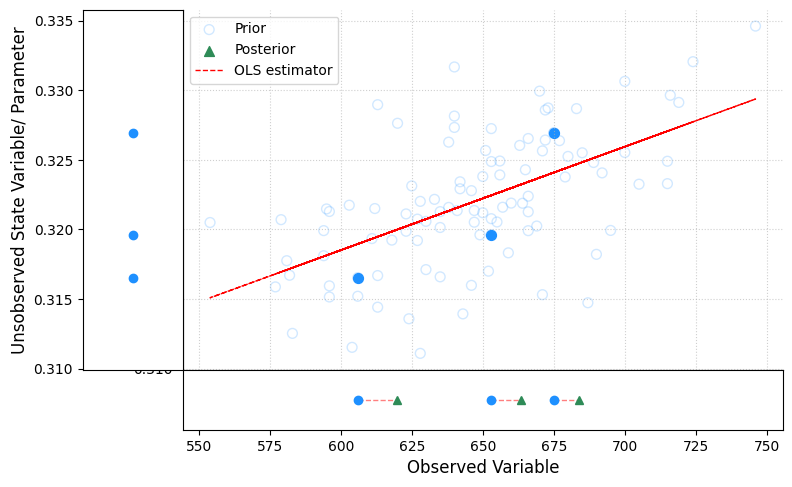

In [11]:
fig = plt.figure(figsize=(10, 6))  # Adjust figure size for subplots

# Main scatter plot
ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # Adjust position and size

ax_main.scatter(prior, prior_beta, marker='o', facecolors='none', alpha=0.2, edgecolors='dodgerblue', label='Prior', s=50)
ax_main.scatter([], [], marker='^', color='seagreen', label='Posterior', s=50)
# ax_main.scatter(post[:3], post_beta[:3], marker='^', color='seagreen', alpha=0.7, label='Posterior', s=50)

# OLS line
m, b = np.polyfit(prior, prior_beta, 1)
ax_main.plot(prior, m*prior + b, color='red', linestyle='--', linewidth=1, label='OLS estimator')

# Connecting lines
examples = [0,2,50]
for i in examples:
    ax_main.scatter(prior[i], prior_beta[i], marker='o', color='dodgerblue', s=50)
    # ax_main.plot([prior[i], post[i]], [prior_beta[i], post_beta[i]], color='red', linestyle='-', linewidth=1)

ax_main.set_xlabel('State Variable (i)', fontsize=12)
ax_main.set_ylabel(r'Parameter ($\beta$)', fontsize=12)
ax_main.legend(fontsize=10)
ax_main.grid(True, linestyle=':', alpha=0.6)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# # Subplot for x-axis distribution
ax_x = fig.add_axes([0.2, 0.1, 0.6, 0.1])  # Adjust position and size
ax_x.set_xlim(ax_main.get_xlim())
ax_x.set_ylim([0, 1])  # Set y-axis limits for visual clarity
for i in examples:
    ax_x.plot([prior[i], post[i]], [0.5, 0.5], '--', alpha=0.5, linewidth=1, color='red')
    ax_x.plot(prior[i], 0.5, '-', marker='o', color='dodgerblue', markersize=6)  # Prior marker
    ax_x.plot(post[i], 0.5, marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_x.set_yticks([])  # Hide y-axis ticks

# # Subplot for y-axis distribution
ax_y = fig.add_axes([0.1, 0.2, 0.1, 0.6])  # Adjust position and size
ax_y.set_ylim(ax_main.get_ylim())
ax_y.set_xlim([0, 1])  # Set x-axis limits for visual clarity
for i in examples:
    ax_y.plot([0.5, 0.5], [prior_beta[i], post_beta[i]], '-', color='red', alpha=0., linewidth=0.8,
             marker='o', markerfacecolor='none', markeredgecolor='dodgerblue', markersize=6)  # Prior marker
    ax_y.plot(0.5, prior_beta[i], marker='o', color='dodgerblue', markersize=6)  # Posterior marker
    # ax_y.plot(0.5, post_beta[i], marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_y.set_xticks([])  # Hide x-axis ticks

ax_x.set_xlabel('Observed Variable', fontsize=12)
ax_y.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)

plt.tight_layout()

plt.savefig(f"unobserved_reg3.pdf", format='pdf', bbox_inches='tight')

/tmp/11723644.1.himem_1d.q/ipykernel_65085/4087366599.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


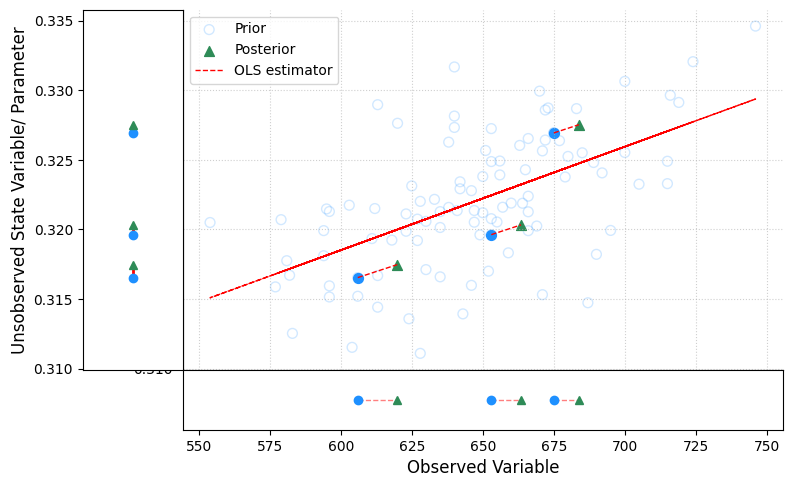

In [12]:
fig = plt.figure(figsize=(10, 6))  # Adjust figure size for subplots

# Main scatter plot
ax_main = fig.add_axes([0.2, 0.2, 0.6, 0.6])  # Adjust position and size

ax_main.scatter(prior, prior_beta, marker='o', facecolors='none', alpha=0.2, edgecolors='dodgerblue', label='Prior', s=50)
ax_main.scatter([], [], marker='^', color='seagreen', label='Posterior', s=50)
# ax_main.scatter(post[:3], post_beta[:3], marker='^', color='seagreen', alpha=0.7, label='Posterior', s=50)

# OLS line
m, b = np.polyfit(prior, prior_beta, 1)
ax_main.plot(prior, m*prior + b, color='red', linestyle='--', linewidth=1, label='OLS estimator')

# Connecting lines
examples = [0,2,50]
for i in examples:
    ax_main.scatter(prior[i], prior_beta[i], marker='o', color='dodgerblue', s=50)
    ax_main.plot([prior[i], post[i]], [prior_beta[i], post_beta[i]], color='red', linestyle='--', linewidth=1)
    ax_main.scatter(post[i], post_beta[i], marker='^', color='seagreen', s=50)

ax_main.set_xlabel('State Variable (i)', fontsize=12)
ax_main.set_ylabel(r'Parameter ($\beta$)', fontsize=12)
ax_main.legend(fontsize=10)
ax_main.grid(True, linestyle=':', alpha=0.6)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# # Subplot for x-axis distribution
ax_x = fig.add_axes([0.2, 0.1, 0.6, 0.1])  # Adjust position and size
ax_x.set_xlim(ax_main.get_xlim())
ax_x.set_ylim([0, 1])  # Set y-axis limits for visual clarity
for i in examples:
    ax_x.plot([prior[i], post[i]], [0.5, 0.5], '--', alpha=0.5, linewidth=1, color='red')
    ax_x.plot(prior[i], 0.5, '-', marker='o', color='dodgerblue', markersize=6)  # Prior marker
    ax_x.plot(post[i], 0.5, marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_x.set_yticks([])  # Hide y-axis ticks

# # Subplot for y-axis distribution
ax_y = fig.add_axes([0.1, 0.2, 0.1, 0.6])  # Adjust position and size
ax_y.set_ylim(ax_main.get_ylim())
ax_y.set_xlim([0, 1])  # Set x-axis limits for visual clarity
for i in examples:
    ax_y.plot([0.5, 0.5], [prior_beta[i], post_beta[i]], '--', alpha=1, linewidth=2, color='red')
    ax_y.plot(0.5, prior_beta[i], '-', marker='o', color='dodgerblue', markersize=6)  # Posterior marker
    ax_y.plot(0.5, post_beta[i], marker='^', color='seagreen', markersize=6)  # Posterior marker
ax_y.set_xticks([])  # Hide x-axis ticks

ax_x.set_xlabel('Observed Variable', fontsize=12)
ax_y.set_ylabel(r'Unsobserved State Variable/ Parameter', fontsize=12)

plt.tight_layout()

plt.savefig(f"unobserved_reg4.pdf", format='pdf', bbox_inches='tight')

# Plot how y prior is transformed into y post

In [13]:
post_shrink = (post - np.mean(post))*0.5 + np.mean(post)

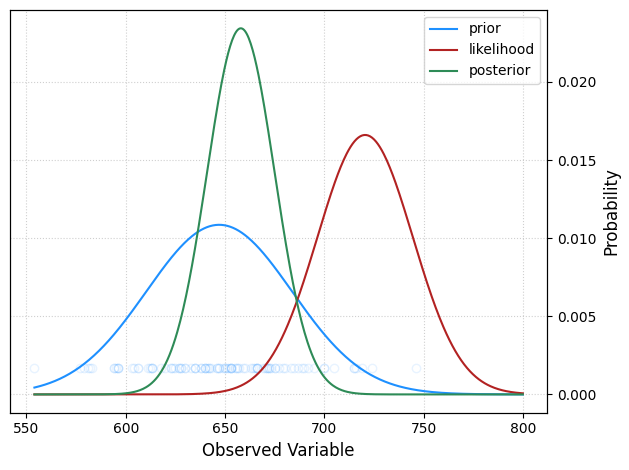

In [14]:
import scipy.stats as stats

fig, ax = plt.subplots()

ax.plot(prior, [0.1]*len(prior), 'o', color='dodgerblue', alpha=0.1, markersize=6, markerfacecolor='none')
# ax.plot(prior - np.mean(prior) + np.mean(post_shrink), [0.15]*len(prior), '^', alpha=0.1, color='seagreen', markersize=6, markerfacecolor='none')
# ax.plot(post_shrink, [0.2]*len(post_shrink), '^', color='seagreen', alpha=0.1, markersize=6, markerfacecolor='none')
ax.set_ylim(0.05,0.5)

ax2 = ax.twinx()
x_vals = np.linspace(min(prior.min(), post_shrink.min()), 800, 500)
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(prior), np.std(prior)), color='dodgerblue', label='prior')
ax2.plot(x_vals, stats.norm.pdf(x_vals, kf.data.i[50], kf.data.i[50]/30), color='firebrick', label='likelihood')
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(post_shrink), np.std(post_shrink)), color='seagreen', label='posterior')
ax2.legend()
ax.set_yticks([])

ax2.grid(True, linestyle=':', alpha=0.6)
ax.grid(True, linestyle=':', alpha=0.6)

ax.set_xlabel('Observed Variable', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)


plt.tight_layout()

plt.savefig(f"observed_reg0.pdf", format='pdf', bbox_inches='tight')

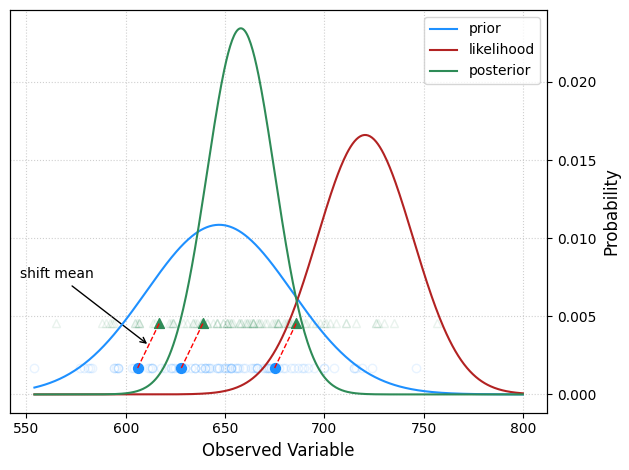

In [15]:
fig, ax = plt.subplots()

ax.plot(prior, [0.1]*len(prior), 'o', color='dodgerblue', alpha=0.1, markersize=6, markerfacecolor='none')
ax.plot(prior - np.mean(prior) + np.mean(post_shrink), [0.15]*len(prior), '^', alpha=0.1, color='seagreen', markersize=6, markerfacecolor='none')
# ax.plot(post_shrink, [0.2]*len(post_shrink), '^', color='seagreen', alpha=0.1, markersize=6, markerfacecolor='none')
ax.set_ylim(0.05,0.5)

# add lines
examples = [20,2,50]
level_2 = prior - np.mean(prior) + np.mean(post_shrink)

for i in examples:
    ax.scatter(prior[i], [0.1], marker='o', color='dodgerblue', s=50)
    ax.scatter(level_2[i], [0.15], marker='^', color='seagreen', s=50)
    ax.plot([prior[i], level_2[i]], [0.1, 0.15], '--', alpha=1, linewidth=1, color='red')

ax2 = ax.twinx()
x_vals = np.linspace(min(prior.min(), post_shrink.min()), 800, 500)
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(prior), np.std(prior)), color='dodgerblue', label='prior')
ax2.plot(x_vals, stats.norm.pdf(x_vals, kf.data.i[50], kf.data.i[50]/30), color='firebrick', label='likelihood')
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(post_shrink), np.std(post_shrink)), color='seagreen', label='posterior')
ax2.legend()
ax.set_yticks([])

ax2.grid(True, linestyle=':', alpha=0.6)
ax.grid(True, linestyle=':', alpha=0.6)

ax.annotate("shift mean", xy=(level_2[examples[1]]-5, 0.125), xytext=(level_2[examples[1]] - 70, 0.2),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

ax.set_xlabel('Observed Variable', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)


plt.tight_layout()

plt.savefig(f"observed_reg1.pdf", format='pdf', bbox_inches='tight')

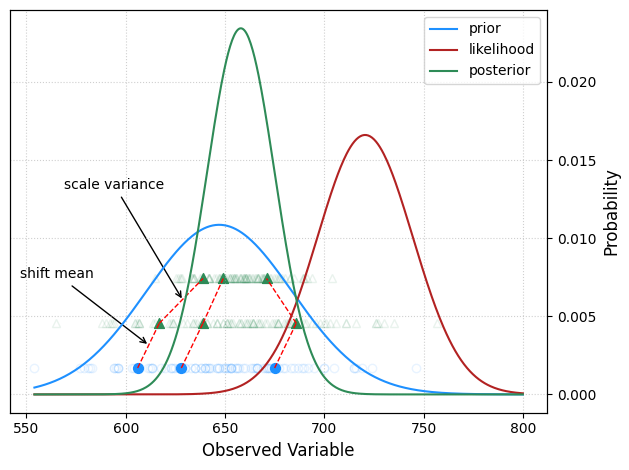

In [16]:
fig, ax = plt.subplots()

ax.plot(prior, [0.1]*len(prior), 'o', color='dodgerblue', alpha=0.1, markersize=6, markerfacecolor='none')
ax.plot(prior - np.mean(prior) + np.mean(post_shrink), [0.15]*len(prior), '^', alpha=0.1, color='seagreen', markersize=6, markerfacecolor='none')
ax.plot(post_shrink, [0.2]*len(post_shrink), '^', color='seagreen', alpha=0.1, markersize=6, markerfacecolor='none')
ax.set_ylim(0.05,0.5)

# add lines
examples = [20,2,50]
level_2 = prior - np.mean(prior) + np.mean(post_shrink)


for i in examples:
    ax.scatter(prior[i], [0.1], marker='o', color='dodgerblue', s=50)
    ax.scatter(level_2[i], [0.15], marker='^', color='seagreen', s=50)
    ax.scatter(post_shrink[i], [0.2], marker='^', color='seagreen', s=50)
    ax.plot([prior[i], level_2[i]], [0.1, 0.15], '--', alpha=1, linewidth=1, color='red')
    ax.plot([level_2[i], post_shrink[i]], [0.15, 0.2], '--', alpha=1, linewidth=1, color='red')

ax2 = ax.twinx()
x_vals = np.linspace(min(prior.min(), post_shrink.min()), 800, 500)
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(prior), np.std(prior)), color='dodgerblue', label='prior')
ax2.plot(x_vals, stats.norm.pdf(x_vals, kf.data.i[50], kf.data.i[50]/30), color='firebrick', label='likelihood')
ax2.plot(x_vals, stats.norm.pdf(x_vals, np.mean(post_shrink), np.std(post_shrink)), color='seagreen', label='posterior')
ax2.legend()
ax.set_yticks([])

ax2.grid(True, linestyle=':', alpha=0.6)
ax.grid(True, linestyle=':', alpha=0.6)

ax.annotate("shift mean", xy=(level_2[examples[1]]-5, 0.125), xytext=(level_2[examples[1]] - 70, 0.2),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

ax.annotate("scale variance", xy=(post_shrink[examples[1]]-10, 0.175), xytext=(post_shrink[examples[1]] - 70, 0.3),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

ax.set_xlabel('Observed Variable', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)


plt.tight_layout()

plt.savefig(f"observed_reg2.pdf", format='pdf', bbox_inches='tight')